In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load dataset
df = pd.read_csv('../data/processed/features_crypto.csv')

# Drop any missing values (just to be safe)
df.dropna(inplace=True)


In [2]:
# Choose the most important features from your EDA
features = ['volatility_7d', 'volatility_21d', 'log_return', 'ma_7', 'ma_21', 'vol_ratio']
target = 'target_vol_7d'

X = df[features]
y = df[target]


In [3]:
# Split into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
model = RandomForestRegressor(
    n_estimators=200,   # number of trees
    max_depth=8,        # limit tree depth (to avoid overfitting)
    random_state=42,
    n_jobs=-1           # use all CPU cores
)

model.fit(X_train, y_train)
print("✅ Model training complete!")


✅ Model training complete!


In [5]:
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"RMSE: {rmse:.5f}")
print(f"MAE : {mae:.5f}")
print(f"R²  : {r2:.5f}")


Model Evaluation Metrics:
RMSE: 2.06117
MAE : 1.53391
R²  : 0.12457


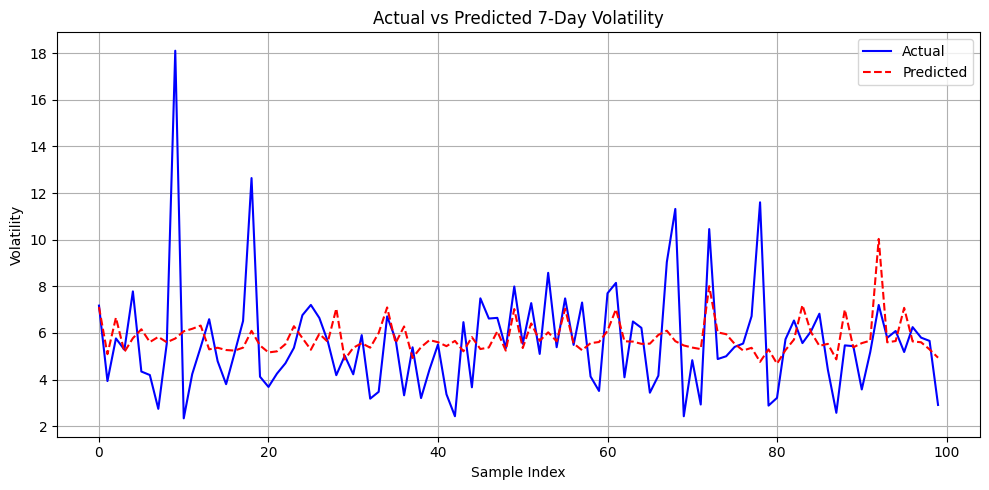

In [6]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(y_pred[:100], label='Predicted', color='red', linestyle='--')
plt.title("Actual vs Predicted 7-Day Volatility")
plt.xlabel("Sample Index")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../reports/figs/actual_vs_predicted.png', dpi=300)
plt.show()


In [7]:
joblib.dump(model, '../models/rf_vol_model.joblib')
print("✅ Model saved as rf_vol_model.joblib")


✅ Model saved as rf_vol_model.joblib


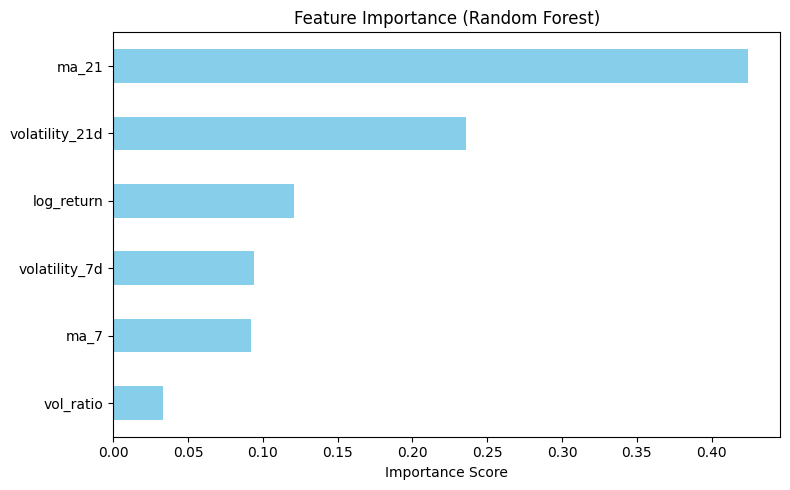

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=features).sort_values()
plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig('../reports/figs/feature_importance_rf.png', dpi=300)
plt.show()


In [9]:
metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²'],
    'Value': [rmse, mae, r2]
})
metrics.to_csv('../reports/model_metrics.csv', index=False)
print("✅ Model metrics saved successfully!")


✅ Model metrics saved successfully!
